In [1]:
import pandas as pd
import os
os.chdir('C:\\Users\\Lalit Max\\Desktop\\Ai Ml\\Supervised-Learning\\Decision-Tree-Classification')
os.getcwd()

'C:\\Users\\Lalit Max\\Desktop\\Ai Ml\\Supervised-Learning\\Decision-Tree-Classification'

In [2]:
dataset = pd.read_csv('PlayTennis.csv')

In [3]:
dataset

,outlook,humidity,windy,play
0,sunny,high,False,no
1,sunny,high,True,no
2,overcast,high,False,yes
3,rainy,high,False,yes
4,rainy,normal,False,yes
5,rainy,normal,True,no
6,overcast,normal,True,yes
7,sunny,high,False,no
8,sunny,normal,False,yes
9,rainy,normal,False,yes


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
outlook=LabelEncoder()
humidity=LabelEncoder()
windy=LabelEncoder()	
play=LabelEncoder()

In [6]:
dataset['outlook'] = outlook.fit_transform(dataset['outlook'])
dataset['humidity'] = humidity.fit_transform(dataset['humidity'])
dataset['windy'] = windy.fit_transform(dataset['windy'])
dataset['play'] = play.fit_transform(dataset['play'])


In [7]:
dataset

,outlook,humidity,windy,play
0,2,0,0,0
1,2,0,1,0
2,0,0,0,1
3,1,0,0,1
4,1,1,0,1
5,1,1,1,0
6,0,1,1,1
7,2,0,0,0
8,2,1,0,1
9,1,1,0,1


In [8]:
features_cols = ['outlook', 'humidity', 'windy']
x = dataset[features_cols]
y = dataset['play']

In [9]:
x

,outlook,humidity,windy
0,2,0,0
1,2,0,1
2,0,0,0
3,1,0,0
4,1,1,0
5,1,1,1
6,0,1,1
7,2,0,0
8,2,1,0
9,1,1,0


In [10]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [13]:
X_test

,outlook,humidity,windy
6,0,1,1
5,1,1,1
12,0,1,0


In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
# classifier  = DecisionTreeClassifier(criterion='gini')
classifier  = DecisionTreeClassifier(criterion='entropy')

In [16]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
classifier.predict(X_test)

array([1, 1, 1])

In [18]:
X_test  # 0->no, 1->yes || Outlook[sunny:2, overcast:0, rainy:1]

,outlook,humidity,windy
6,0,1,1
5,1,1,1
12,0,1,0


In [19]:
classifier.score(X_test, y_test)

0.6666666666666666

[Text(0.6666666666666666, 0.9, 'x[1] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.5, 0.7, 'x[0] <= 1.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.16666666666666666, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.3, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

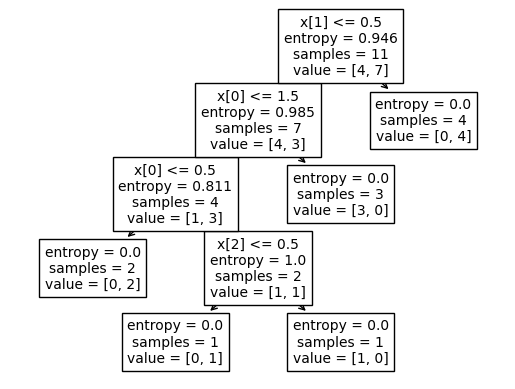

In [20]:
from sklearn import tree
tree.plot_tree(classifier)